# Neural Networks

## Introduction

Neural networks are a type of machine learning model loosely inspired by the brain and have found great success in the past decade in part thanks to the availability of large datasets and fast GPUs. They are a type of *deep learning* model, which are models that have many layers of computation. In this portfolio we will introduce the basic concepts of neural networks and implement three different types of neural networks in Python using TensorFlow. In particular, we'll implement a simple feedforward neural network and a convolutional neural network (CNN) for classification, and a convolutional variational autoencoder (VAE) for image generation.

## Basics
A neural network is composed of many small functions called *neurons* that are connected together in a *layer*. Each neuron takes in some input $x$ and outputs some value $y$ based on a *weight* $w$ and a *bias* $b$ (both of which are learnable parameters and typically initialized randomly):
$$y = \phi(wx + b)$$
where $\phi$ is a non-linear function called the *activation function* often taken to be the sigmoid function, a hyperbolic tangent function, or a rectified linear unit (ReLU) function. 
- Sigmoid function: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- Hyperbolic tangent function: $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
- ReLU function: $$\max(0, x)$$

In particular, note that the sigmoid and hyperbolic tangent functions are smooth and saturate at large values, while the ReLU function is not smooth and does not saturate at large values, leading to different use-cases for each activation function.

### Feedforward Neural Networks

In a regular feed-forward neural network, neurons are arranged in $L \in \mathbb{N}$ layers with $n_l \in \mathbb{N}$ neurons in layer $l$. The first layer is called the *input layer*, the last layer is called the *output layer* and the layers in between are called *hidden layers*. The output of the $l$ th layer is the input to the $(l+1)$ th layer, such that the output of the $L$ th layer is the output of the neural network.
The weights and biases of each neuron are stored in matrices $W_l \in \mathbb{R}^{n_l \times n_{l+1}}$ and $b_l \in \mathbb{R}^{n_{l+1}}$ respectively, such that the output of the $l$ th layer is given by:
$$x_{l+1} = \phi(W_lx_l + b_l)$$
We calculate the output of each layer in turn, this is called the *forward pass*.

### Backpropagation
Given a loss function $L$ that measures how well the neural network is performing, we can calculate the derivative of the loss function with respect to each weight and bias in the neural network. This is called the *backward pass* and is done using the *backpropagation* algorithm. The derivative of the loss function with respect to the output of the $L$ th layer is given by:
$$\frac{\partial L}{\partial x_L} = \frac{\partial L}{\partial y_L} \frac{\partial y_L}{\partial x_L}$$
where $\frac{\partial L}{\partial y_L}$ is the derivative of the loss function with respect to the output of the neural network, and $\frac{\partial y_L}{\partial x_L}$ is the derivative of the activation function with respect to the output of the $L$ th layer. The derivative of the loss function with respect to the weights and biases of the $L$ th layer is given by:
$$\frac{\partial L}{\partial W_L} = \frac{\partial L}{\partial x_L} \frac{\partial x_L}{\partial W_L}$$
$$\frac{\partial L}{\partial b_L} = \frac{\partial L}{\partial x_L} \frac{\partial x_L}{\partial b_L}$$
where $\frac{\partial x_L}{\partial W_L}$ and $\frac{\partial x_L}{\partial b_L}$ are the derivatives of the output of the $L$ th layer with respect to the weights and biases of the $L$ th layer respectively (these are easily computable if we've chosen differentiable activation functions). We can then calculate the derivatives of the loss function with respect to the output of the $(L-1)$ th layer using the chain rule:
$$\frac{\partial L}{\partial x_{L-1}} = \frac{\partial L}{\partial x_L} \frac{\partial x_L}{\partial x_{L-1}}$$
and so do so each layer until we reach the first layer. We can then update the weights and biases of the neural network using gradient descent (or some other optimization algorithm, such as Adam or RMSProp):
$$W_l \leftarrow W_l - \eta \frac{\partial L}{\partial W_l}$$
$$b_l \leftarrow b_l - \eta \frac{\partial L}{\partial b_l}$$
where $\eta>0$ is the learning rate.

By repeatedly performing the forward pass and the backward pass, we can train the neural network to perform well on a given task, such as classification or regression.
The following code implements a simple feedforward neural network in TensorFlow for classification on the `iris` dataset containing 150 samples of three different species of iris flower, each with four features: sepal length, sepal width, petal length, and petal width (so $n_0 = 4$). We will use a neural network with two hidden layers, each with 10 neurons (so $n_1 = n_2 = 10$), and an output layer with three neurons (so $n_3 = 3$). We will use the ReLU activation function for the hidden layers and the softmax activation function for the output layer. The softmax activation function is given by:
$$\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$
and is often used for classification problems as it outputs a probability distribution over the classes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf

X, y = load_iris(as_frame = True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

2023-05-26 22:21:19.163085: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-26 22:21:19.192918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 22:21:19.354302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 22:21:19.355433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 22:21:20.022918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Above we've split the data into training and test sets. We'll use the training set to train the neural network and the test set to evaluate the performance of the neural network. Next we'll repeat the training data 20 times to make the training data larger and to make the training process more stable, as well as organizing the training data into batches of size 32 to make the training process faster (this is called *mini-batch gradient descent*).

In [2]:
train = train.repeat(20).shuffle(1000).batch(32) 
test = test.batch(1)

Next we define the layers of our neural network. We'll use the `Dense` layer from TensorFlow, which is a fully-connected layer, with the `ReLU` activation function. Then we specify that we want to use the `sparse_categorial_crossentropy` loss function, which is the cross-entropy loss function for classification problems, given by:
$$L = -\sum_{i=1}^n y_i \log(p_i)$$
where $y_i$ is the true label of the $i$ th sample and $p_i$ is the predicted probability of the $i$ th sample belonging to the correct class. We also specify that we want to use the `Adam` optimizer, which is a popular optimization algorithm which updates the parameters $W$ and $b$ of the neural network using the following update rule:
$$W \leftarrow W - \eta \frac{m}{\sqrt{v} + \epsilon}$$
$$b \leftarrow b - \eta \frac{m}{\sqrt{v} + \epsilon}$$
where $\eta>0$ is the learning rate, $m$ is the first moment of the gradient, $v$ is the second moment of the gradient, and $\epsilon>0$ is a small number to prevent division by zero.

Finally, we specify that we want to use the `accuracy` metric to evaluate the performance of the neural network.

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),   # hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.relu),   # hidden layer
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)  # output layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


We train the neural network for 10 epochs (i.e. 10 passes through the (already repeated 20 times) training data) and evaluate the performance of the neural network on the test data.

In [4]:
model.fit(
    train,
    validation_data=test,
    epochs=10,
)

Epoch 1/10


2023-05-26 22:22:29.084692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2023-05-26 22:22:29.084854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [120,4]
	 [[{{node Placeholder/_0}}]]


75/75 [==============================] - 1s 2ms/step - loss: 1.5098 - accuracy: 0.2387 - val_loss: 1.0536 - val_accuracy: 0.3333
Epoch 2/10
75/75 [==============================] - 0s 876us/step - loss: 0.9138 - accuracy: 0.5288 - val_loss: 0.7473 - val_accuracy: 0.7333
Epoch 3/10
 1/75 [..............................] - ETA: 0s - loss: 0.7233 - accuracy: 0.8438

2023-05-26 22:22:29.522856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


75/75 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.8646 - val_loss: 0.5223 - val_accuracy: 0.9667
Epoch 4/10
75/75 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.9479 - val_loss: 0.3510 - val_accuracy: 1.0000
Epoch 5/10
75/75 [==============================] - 0s 854us/step - loss: 0.3186 - accuracy: 0.9638 - val_loss: 0.2510 - val_accuracy: 1.0000
Epoch 6/10
75/75 [==============================] - 0s 922us/step - loss: 0.2351 - accuracy: 0.9692 - val_loss: 0.1900 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 0s 870us/step - loss: 0.1866 - accuracy: 0.9675 - val_loss: 0.1695 - val_accuracy: 1.0000
Epoch 8/10
75/75 [==============================] - 0s 823us/step - loss: 0.1573 - accuracy: 0.9675 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 9/10
75/75 [==============================] - 0s 840us/step - loss: 0.1365 - accuracy: 0.9717 - val_loss: 0.1165 - val_accuracy: 1.0000
Epoch 10/10
75/75 [==

We see that our neural network is getting 100% accuracy on the test set (given as `val_accuracy`). 
With our now trained neural network, we can make predictions on new data. Specifically, we define `predict_X` which is an array of 3 input data points that should be classified as "setosa", "versicolor", and "virginica" respectively. We see below that the neural network correctly classifies all three data points.

In [6]:
predict_X = [
[5.1, 3.3, 1.7, 0.5],
[5.9, 3.0, 4.2, 1.5],
[6.9, 3.1, 5.4, 2.1],
]
predictions = model.predict(predict_X)
for pred_dict, expected in zip(predictions, ["setosa", "versicolor", "virginica"]):
    predicted_index = pred_dict.argmax()
    predicted = load_iris().target_names[predicted_index]
    probability = pred_dict.max()
    tick_cross = "✓" if predicted == expected else "✗"
    print(f"{tick_cross} Prediction is '{predicted}' ({100 * probability:.1f}%), expected '{expected}'")


1/1 [==============================] - 0s 20ms/step
✓ Prediction is 'setosa' (97.4%), expected 'setosa'
✓ Prediction is 'versicolor' (92.6%), expected 'versicolor'
✓ Prediction is 'virginica' (74.9%), expected 'virginica'


## Convolutional Neural Networks (CNNs)

One of the main problems with the neural network we just implemented is that it doesn't take into account the spatial structure of the data. For example, if we were to feed the neural network an image of a cat, it would treat each pixel of the image as independent of the other pixels, which is clearly not the case. Convolutional neural networks (CNNs) are a type of neural network that take into account the spatial structure of the data by applying image kernel convolutions. CNNs are commonly used for image classification, object detection, and image segmentation.

### Image Kernel Convolutions
Given an image $f(x,y)$ and a kernel $w(x,y)$, the convolution of the image with the kernel is given by:
$$g(x,y) = w \ast f(x,y) = \sum_{dx=-a}^a \sum_{dy=-b}^b w(dx,dy) f(x-dx, y-dy)$$
where $a$ and $b$ are the half-widths of the kernel. For example, if $w$ is a 3x3 kernel, then $a=b=1$.
We can think of the kernel as a filter that we apply to the image. For example, if we use the following kernel:
$$ w = \begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix} $$
then we can think of this as a filter that detects vertical edges in the image. We can also use this kernel to detect horizontal edges by rotating the kernel by 90 degrees:
$$ w = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix} $$

In practice, we also often apply a non-linear activation function to the output of the convolution, as we did with the neural network we implemented above, and we also have to choose the size of the kernel and the number of kernels to use (as well as how to deal with the edges of the image---typically we use padding to make the output image the same size as the input image).

By consecutively applying different kernels to an image (i.e. in convolutional layers), we can extract different features from the image, and the main idea behind CNNs is to learn the kernels that extract the most useful features from the image for the task at hand.

We can also use *pooling layers* to reduce the size of the image (e.g. max pooling). These just take a window of pixels and output the max value (or average value), meaning we can reduce the size of the image without losing too much information (downsampling). We can also use *stride* to reduce the size of the image (e.g. stride of 2 means we only take every other pixel).
Towards the end of the the CNN model we define below, we also use fully connected layers just like the ones we've seen before, but we flatten the image first (i.e. we take the image and turn it into a vector of pixel values), as well as a dropout layer, which randomly sets some of the pixel values to zero, which helps prevent overfitting.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5,
        padding="same",
        activation=tf.nn.relu
    ),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=5,
        padding="same",
        activation=tf.nn.relu
    ),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=5,
        padding="same",
        activation=tf.nn.relu
    ),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=5,
        padding="same",
        activation=tf.nn.relu
    ),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

For this model, we'll use the MNIST dataset, which contains 70,000 images of handwritten digits (0-9), each of which is 28x28 pixels each taking values between 0 and 255, but we'll normalize the pixel values to be between 0 and 1. 

As before we split the data into training and test sets, and organize the data into batches of size 128 before training the model for 10 epochs using the `Adam` optimizer and the `sparse_categorical_crossentropy` loss function. We again use the `accuracy` metric to evaluate the performance of the model.

In [9]:
import tensorflow_datasets as tfds

ds_train, ds_test = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True,
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img)

ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(128)

ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)
model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10,
)

/home/dg22309/Documents/Compass First Year/Compass/SC2/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/10


2023-05-26 22:37:24.168433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-26 22:37:24.168691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


467/469 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.9067

2023-05-26 22:37:35.372165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-26 22:37:35.372435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]


469/469 [==============================] - 12s 24ms/step - loss: 0.2900 - accuracy: 0.9069 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0677 - accuracy: 0.9807 - val_loss: 0.0426 - val_accuracy: 0.9864
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0458 - accuracy: 0.9865 - val_loss: 0.0308 - val_accuracy: 0.9896
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0279 - val_accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0246 - val_accuracy: 0.9927
Epo

We see that our model is getting 99.3% accuracy on the test set (given as `val_accuracy`), but we can also test on new data that doesn't come from the MNIST dataset, in particular we use the following images of the digits 1-9 and a picture of a dog:

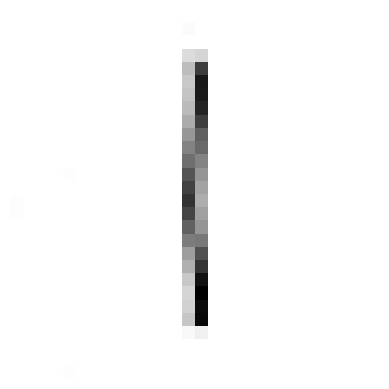

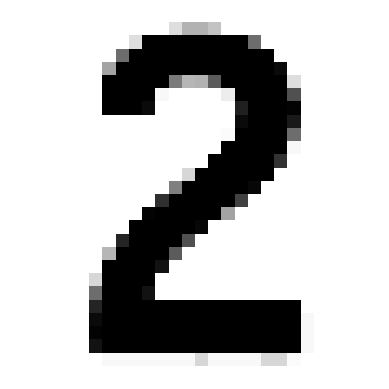

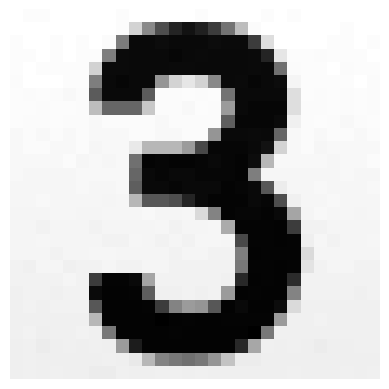

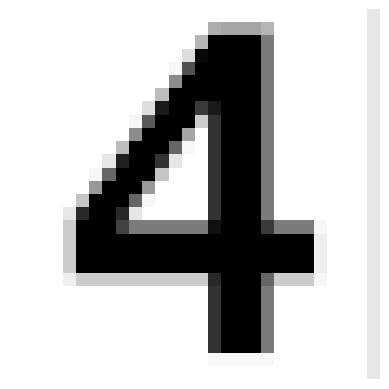

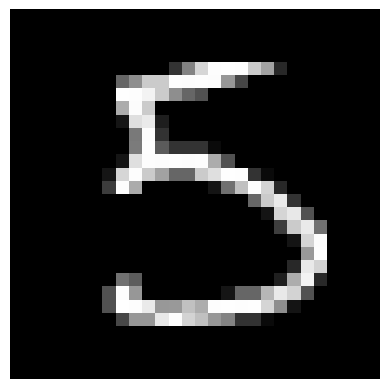

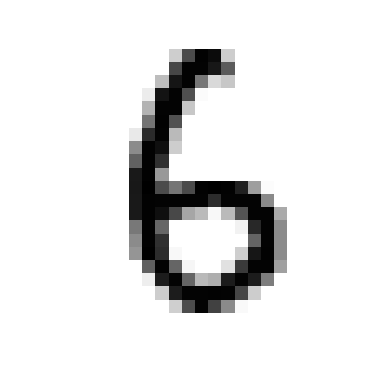

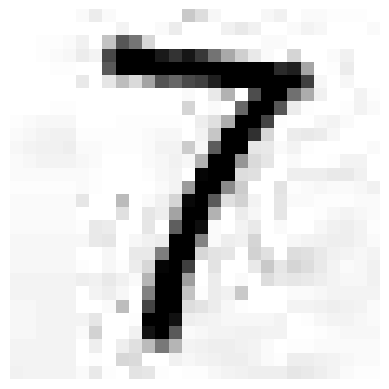

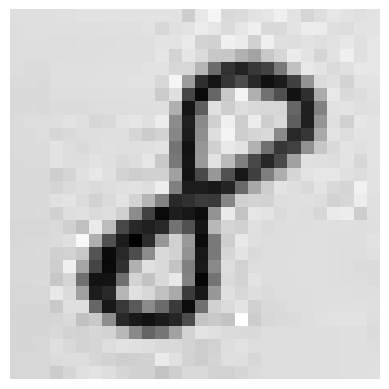

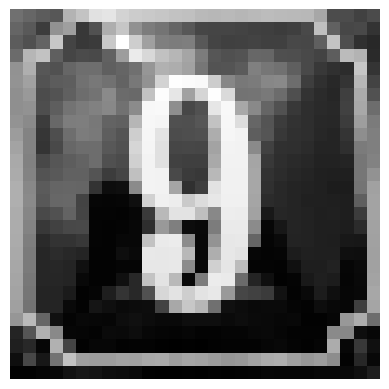

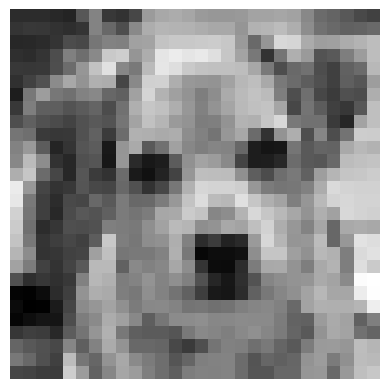

In [11]:
from urllib.request import urlretrieve
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

for i in list(range(1,10)) + ["dog"]:
    urlretrieve(f"https://github.com/milliams/intro_deep_learning/raw/master/{i}.png", f"{i}.png")

images = []
for i in list(range(1,10)) + ["dog"]:
    images.append(np.array(imread(f"{i}.png")/255.0, dtype="float32"))
images = np.array(images)[:,:,:,np.newaxis]

for img in images:
    plt.figure()
    plt.imshow(img[:,:,0], cmap="gray")
    plt.axis("off")

In [12]:
probabilities = model.predict(images)
truths = list(range(1, 10)) + ["dog"]

table = []
for truth, probs in zip(truths, probabilities):
    prediction = probs.argmax()
    if truth == 'dog':
        print(f"{truth}. CNN thinks it's a {prediction} ({probs[prediction]*100:.1f}%)")
    else:
        print(f"{truth} at {probs[truth]*100:4.1f}%. CNN thinks it's a {prediction} ({probs[prediction]*100:4.1f}%)")
    table.append((truth, probs))

1/1 [==============================] - 0s 42ms/step
1 at 39.0%. CNN thinks it's a 1 (39.0%)
2 at 64.3%. CNN thinks it's a 2 (64.3%)
3 at  5.8%. CNN thinks it's a 1 (31.5%)
4 at  0.9%. CNN thinks it's a 2 (71.3%)
5 at 100.0%. CNN thinks it's a 5 (100.0%)
6 at  3.4%. CNN thinks it's a 3 (30.5%)
7 at  4.3%. CNN thinks it's a 4 (41.3%)
8 at  5.3%. CNN thinks it's a 1 (52.3%)
9 at  4.5%. CNN thinks it's a 8 (25.2%)
dog. CNN thinks it's a 8 (20.6%)


Using our model to predict the labels of these images, we see that the it correctly classifies 1, 2, and 5, but is only really confidently correct about 5. This is because 5 is the only one of these images that looks similar to those in the MNIST dataset---the others have inverted colours and/or are not handwritten (or are a dog). This shows that our model is overfitting to the MNIST dataset, and we would need to train it on a more diverse dataset to get better performance on these images. One common way to do this is to augment the training data by applying random transformations to the images (e.g. rotating, flipping, cropping, etc.). In particular, we'll just add inverted versions of the images to the training data, and see how this affects the performance of the model.

In [13]:
ds_train, ds_test = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True,
)

def invert_img(image, label):
    return 1.-image, label

ds_train = ds_train.map(normalize_img)
ds_train = ds_train.concatenate(ds_train.map(invert_img))  # new line
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(128)

ds_test = ds_test.map(normalize_img)
ds_test = ds_test.concatenate(ds_test.map(invert_img))  # new line
ds_test = ds_test.batch(128)

model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10,
)

Epoch 1/10
  3/938 [..............................] - ETA: 27s - loss: 0.0295 - accuracy: 0.9948 

2023-05-26 22:50:38.337692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype string and shape [1]
	 [[{{node Placeholder/_24}}]]
2023-05-26 22:50:38.338011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_27' with dtype int64 and shape [1]
	 [[{{node Placeholder/_27}}]]


937/938 [============================>.] - ETA: 0s - loss: 0.0563 - accuracy: 0.9830

2023-05-26 22:51:00.264260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-26 22:51:00.264649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_26' with dtype string and shape [1]
	 [[{{node Placeholder/_26}}]]


938/938 [==============================] - 23s 25ms/step - loss: 0.0563 - accuracy: 0.9830 - val_loss: 0.0878 - val_accuracy: 0.9718
Epoch 2/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 3/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 4/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 5/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0460 - val_accuracy: 0.9891
Epoch 6/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 7/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0478 - val_accuracy: 0.9902
Epo

In [14]:
probabilities = model.predict(images)
truths = list(range(1, 10)) + ["dog"]

table = []
for truth, probs in zip(truths, probabilities):
    prediction = probs.argmax()
    if truth == 'dog':
        print(f"{truth}. CNN thinks it's a {prediction} ({probs[prediction]*100:.1f}%)")
    else:
        print(f"{truth} at {probs[truth]*100:4.1f}%. CNN thinks it's a {prediction} ({probs[prediction]*100:4.1f}%)")
    table.append((truth, probs))

1/1 [==============================] - 0s 16ms/step
1 at 48.1%. CNN thinks it's a 1 (48.1%)
2 at 100.0%. CNN thinks it's a 2 (100.0%)
3 at 100.0%. CNN thinks it's a 3 (100.0%)
4 at 100.0%. CNN thinks it's a 4 (100.0%)
5 at 100.0%. CNN thinks it's a 5 (100.0%)
6 at 100.0%. CNN thinks it's a 6 (100.0%)
7 at 99.9%. CNN thinks it's a 7 (99.9%)
8 at 100.0%. CNN thinks it's a 8 (100.0%)
9 at  8.9%. CNN thinks it's a 8 (33.4%)
dog. CNN thinks it's a 8 (35.4%)


Here we see again a very high accuracy on the training and test set, and importantly, much better results on the new images, with the model correctly classifying all of them except the image of the `9` which is a photo of a house number and the image that is of course a dog (but it is a good sign that on the dog image the neural network is not confident with its prediction of `8`). This shows that data augmentation can be a very useful tool to prevent overfitting and improve the performance of neural networks, and that in general the training data should be as diverse (ideally) as the data we want to make predictions on.

## VAEs

Autoencoders are a type of neural network that are trained to reconstruct their input after first encoding the input down to a lower-dimensional latent representation. These are often used for dimensionality reduction, but they can also be used for anomaly detection and generative modeling. Variational autoencoders are a type of autoencoder that are trained to learn a latent space that follows a prior distribution, such as a normal distribution. This is done using a loss function that penalizes the latent space for deviating from the prior distribution, using the KL divergence between the prior distribution and the latent space, alongside the regular reconstruction loss of autoencoders (simply the mean squared error between the input and the reconstructed input).

VAEs have two parts, the encoder and the decoder.
The encoder takes in the input data and outputs the mean and standard deviation in a bottleneck layer, which will be of a much lower dimension than the input/output layers (and in particular, the dimension of the latent space will be half the number of neurons in the bottleneck layer since each dimension requires one mean value and one standard deviation value).
We will sample from this latent space based on the encoded mean and standard deviation to obtain a sample which we can pass through the decoder to get a reconstructed version of the input data and then calculate our loss and train the network via backpropagation as usual. Importantly, the samples are obtained from the latent space using the reparameterization trick, which allows us to backpropagate through the sampling process. This is done by sampling from a standard normal distribution $\mathcal{N}(0,1)$ and then scaling and shifting the sample by the mean and standard deviation of the latent space. This way the scaling and shifting are differentiable, so we can backpropagate through them (whereas sampling straight from the non-reparameterized distribution and not scaling/shifting is not differentiable).

The loss function for a VAE is given by:
$$ \mathcal{L} = \mathcal{L}_{\text{reconstruction}} + \mathcal{L}_{\text{KL}} $$
where
$$ \mathcal{L}_{\text{reconstruction}} = \frac{1}{N} \sum_{i=1}^N \left( x_i - \hat{x}_i \right)^2 $$
and
$$ \mathcal{L}_{\text{KL}} = -\frac{1}{2} \sum_{j=1}^J \left( 1 + \log \left( \sigma_j^2 \right) - \mu_j^2 - \sigma_j^2 \right) $$
where $N$ is the number of samples, $J$ is the dimension of the latent space, and $\mu_j$ and $\sigma_j$ are the mean and standard deviation of the $j$th dimension of the latent space.
The first term is the mean squared error between the input and the reconstructed input, and the second term is the KL divergence between the latent space and the prior distribution (which is a standard normal distribution $\mathcal{N}(0,1)$).

Below we implement a convolutional VAE with $J=2$ on the MNIST dataset. (We could have just flattened our images and used a non-convolutional encoder and decoder, applying multiple fully connected layers, but instead we apply two convolutions first before one fully-connected layer into our latent space, and reverse this process for our decoder.)
This code mainly comes from https://www.tensorflow.org/tutorials/generative/cvae, but afterwards we'll see how we can use our trained encoder to classify the MNIST digits (and non-MNIST digits) using a simple fully-connected neural network.

In [55]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),

            # 7x7x32 because the image is 28x28 and we're going to apply 2 strides of 2
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),  
            tf.keras.layers.Conv2DTranspose(
                filters=128, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    # this is the reparemeterization trick that allows us to sample in a differentiable manner
    # we sample from a standard normal and then scale and shift by the mean and variance
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

We optimise this with the `Adam` optimizer on a slightly modified loss function to the typical VAE loss defined above. In particular, we use `tf.nn.sigmoid_cross_entropy_with_logits` to calculate the reconstruction loss, which is the binary cross entropy between the input and the reconstructed input, rather than the mean squared error. We also use the `tf.reduce_mean` function to calculate the mean of the loss over the batch, rather than the sum, since the loss is already averaged over the batch in the `tf.nn.sigmoid_cross_entropy_with_logits` function.

In [56]:
optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi), axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


We reload the MNIST dataset to ignore the repetitions and augmentations we previously applied, and this time binarise the pixel values to 0 or 1 and use batches of size 64.

In [63]:
from IPython import display
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import time

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_size = 60000
batch_size = 64
test_size = 10000

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))


We'll train for 10 epochs and at each epoch we'll plot the reconstructed images for 16 images from the test set, shown below.

2023-05-27 00:01:37.391667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-05-27 00:01:37.391957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]


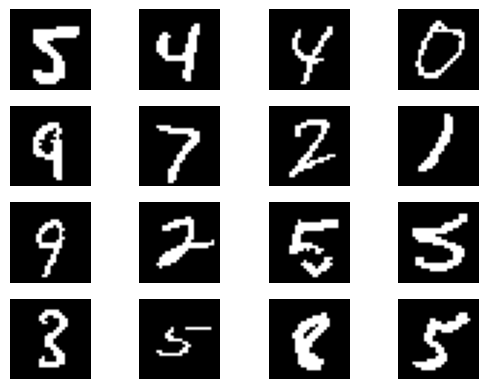

In [58]:
epochs = 10
latent_dim = 2
model = CVAE(latent_dim)

num_examples_to_generate = 16

# Pick a sample of the test set for generating output images
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

for i in range(test_sample.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_sample[i, :, :, 0], cmap='gray')
    plt.axis('off')

Initially, of course, the reconstructions are just pure noise:

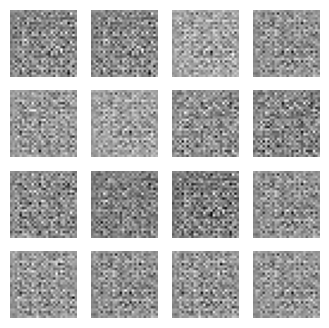

In [59]:
def generate_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  plt.show()

generate_images(model, 0, test_sample)

But as we train the VAE we'll see that these reconstructions become more and more like the original images:

2023-05-27 00:01:42.528015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-05-27 00:01:42.528238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-05-27 00:02:20.256197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float 

Epoch: 1, Test set ELBO: -185.94139099121094, time elapse for current epoch: 37.77862000465393


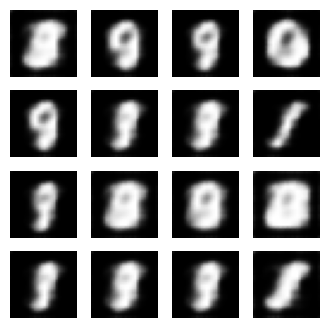

Epoch: 2, Test set ELBO: -172.49105834960938, time elapse for current epoch: 37.79544019699097


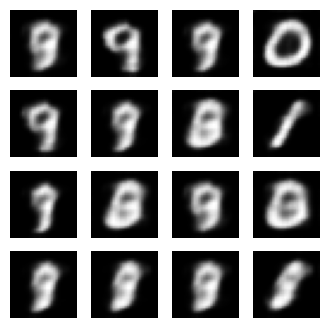

Epoch: 3, Test set ELBO: -167.52139282226562, time elapse for current epoch: 39.21526217460632


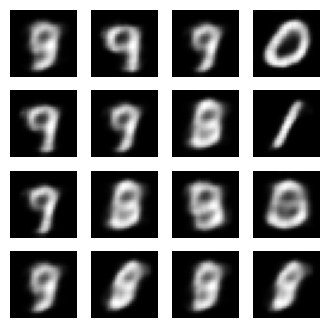

Epoch: 4, Test set ELBO: -164.19972229003906, time elapse for current epoch: 42.30032205581665


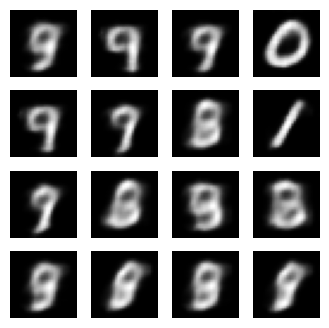

Epoch: 5, Test set ELBO: -161.5315704345703, time elapse for current epoch: 41.969956159591675


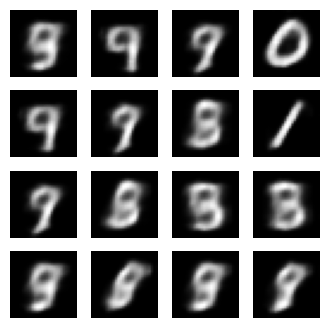

Epoch: 6, Test set ELBO: -159.97572326660156, time elapse for current epoch: 39.7847797870636


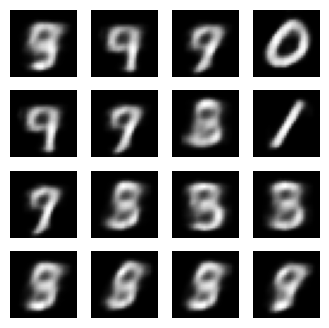

Epoch: 7, Test set ELBO: -158.2575225830078, time elapse for current epoch: 40.41305112838745


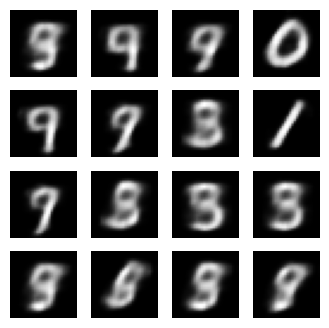

Epoch: 8, Test set ELBO: -157.392578125, time elapse for current epoch: 42.30586814880371


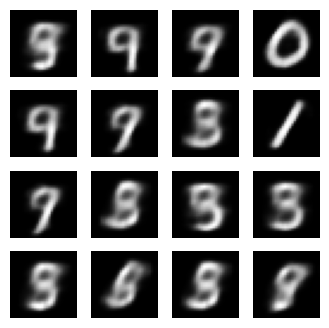

Epoch: 9, Test set ELBO: -156.69757080078125, time elapse for current epoch: 43.07064390182495


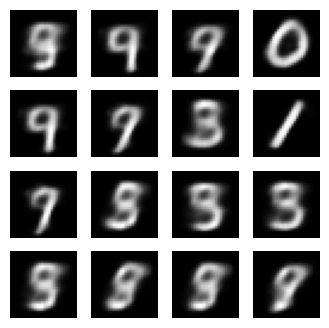

Epoch: 10, Test set ELBO: -156.1296844482422, time elapse for current epoch: 43.883824586868286


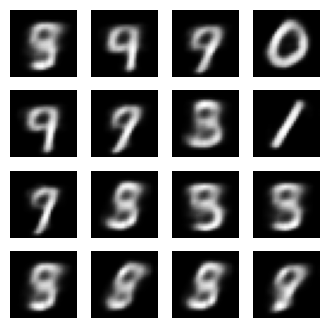

In [60]:
for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  # display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_images(model, epoch, test_sample)


One benefit of having a 2D latent space (other than a large amount of compression) is the ability to easily visualise it. In particular, we can take a grid of points in the latent space and pass them through the decoder to see what the reconstructed images look like. We do this below, and can see the general structure of the latent space, with clearly identifiable 0s, 1s, 7s and 9s and vaguely familiar 5s and 8s in the centre-right. One nice feature we can see is the way in which interpolating between two points in the latent space gives us a smooth transition between the two images in the reconstructed space, i.e. between the two digits in the original space. 

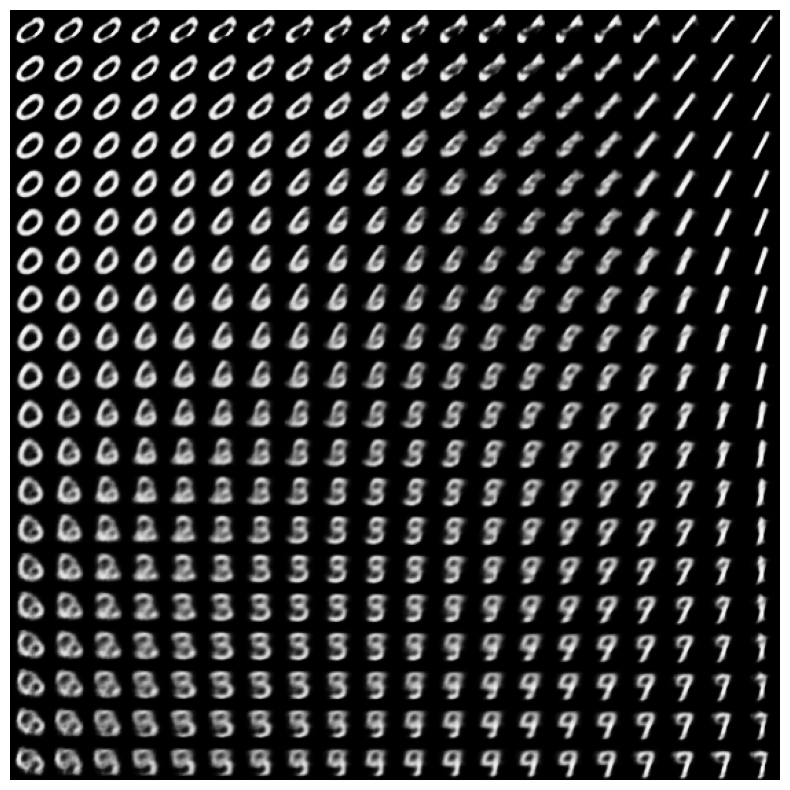

In [61]:
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()
plot_latent_images(model, 20)


### Using a VAE for classification

Now we can obtain the latent space representation of each image in the MNIST dataset by passing it through the encoder, and then use these latent space representations to train a simple fully-connected neural network to classify the images.


In [97]:
# obtain training encodings
train_encodings = model.encode(train_images)
test_encodings = model.encode(test_images)

train_encodings = tf.concat(train_encodings, axis=1)
test_encodings = tf.concat(test_encodings, axis=1)


We'll use a 4-layer fully-connected neural network with 128 neurons in each hidden layer, and a final output layer with 10 neurons (one for each digit). We'll use the `Adam` optimizer and the `SparseCategoricalCrossentropy` loss function, and train for 10 epochs. 

In [104]:
train = tf.data.Dataset.from_tensor_slices((train_encodings, train_labels))
test = tf.data.Dataset.from_tensor_slices((test_encodings, test_labels))

train = train.batch(32) 
test = test.batch(1)

# define our classifier
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),   # hidden layer
    tf.keras.layers.Dense(128, activation=tf.nn.relu),   # hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output layer
])

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# train the classifier
classifier.fit(
    train,
    validation_data=test,
    epochs=10,
)


Epoch 1/10


2023-05-27 00:28:49.526576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [60000]
	 [[{{node Placeholder/_1}}]]


1873/1875 [============================>.] - ETA: 0s - loss: 1.1012 - accuracy: 0.5926

2023-05-27 00:28:56.414671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


1875/1875 [==============================] - 28s 14ms/step - loss: 1.1011 - accuracy: 0.5926 - val_loss: 1.0668 - val_accuracy: 0.5952
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.9848 - accuracy: 0.6330 - val_loss: 0.9928 - val_accuracy: 0.6305
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.9508 - accuracy: 0.6444 - val_loss: 0.9622 - val_accuracy: 0.6368
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.9259 - accuracy: 0.6533 - val_loss: 0.9469 - val_accuracy: 0.6387
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.9059 - accuracy: 0.6607 - val_loss: 0.9460 - val_accuracy: 0.6375
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.8909 - accuracy: 0.6678 - val_loss: 0.9355 - val_accuracy: 0.6384
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.8800 - accuracy: 0.6723 - val_loss: 0.9258 - val_accura

This is only giving us a test accuracy of around 65%, which isn't great, but considering we're only using a 2D latent space, it's not too bad. Testing on our non-MNIST images we see pretty awful results (with the exception of a 100% confident correct prediction on the image of the `6`), but this is to be expected since the VAE was trained on MNIST images, and the non-MNIST images are very different to the MNIST images, plus the 2D latent space is not very expressive, even for MNIST images.

In [110]:
# evaluate the classifier on non-MNIST data
probabilities = classifier.predict(tf.concat(model.encode(images), axis=1))
truths = list(range(1, 10)) + ["dog"]

for truth, probs in zip(truths, probabilities):
    prediction = probs.argmax()
    if truth == 'dog':
        print(f"{truth}. CVAE-classifier thinks it's a {prediction} ({probs[prediction]*100:.1f}%)")
    else:
        print(f"{truth} at {probs[truth]*100:4.1f}%. VCAE-classifier thinks it's a {prediction} ({probs[prediction]*100:4.1f}%)")

1/1 [==============================] - 0s 11ms/step
1 at  0.0%. VCAE-classifier thinks it's a 5 (45.8%)
2 at  0.0%. VCAE-classifier thinks it's a 6 (99.4%)
3 at  0.0%. VCAE-classifier thinks it's a 6 (96.5%)
4 at  0.1%. VCAE-classifier thinks it's a 5 (91.5%)
5 at 12.8%. VCAE-classifier thinks it's a 2 (32.8%)
6 at 100.0%. VCAE-classifier thinks it's a 6 (100.0%)
7 at  0.0%. VCAE-classifier thinks it's a 6 (100.0%)
8 at  0.7%. VCAE-classifier thinks it's a 6 (40.8%)
9 at  1.8%. VCAE-classifier thinks it's a 2 (76.4%)
dog. CVAE-classifier thinks it's a 2 (57.3%)
